In [2]:
import numpy as np

1) Implantez une fonction recevant une liste de couples (xi,yi) ainsi qu'une liste d'abscisses αi et qui renvoie la liste des valeurs P(αi), P étant le polynôme d'interpolation construit sur les points (xi,yi).
2) Implantez cette même fonction par le biais de la méthode barycentrique et comparez les deux méthodes en termes de vitesses d'exécution avec des listes αi conséquentes.
3) Implantez le calcul de P(α) par l'algorithme de Neville-Atiken. Comparez sur quelques exemples la vitesse de convergence jusqu'à une certaine précision dans les cas suivants :
        Les (xi,yi) sont intégrés au calcul dans un ordre aléatoire (éventuellement celui fourni par l'utilisateur).
        Les (xi,yi) sont intégrés au calcul dans l'ordre de la distance décroissante entre xi et α.
        Les (xi,yi) sont intégrés au calcul dans l'ordre de la distance croissante entre xi et α.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def interpolation_lagrange(x, y, alpha):

    P_alpha = []
    for alpha_i in alpha:
        L = np.zeros(len(x))
        for i in range(len(x)):
            L[i] = 1
            for j in range(len(x)):
                if i != j:
                    L[i] *= (alpha_i - x[j]) / (x[i] - x[j])
        P_alpha.append(sum(y * L))
    return P_alpha


In [4]:
x = [0, 1, 2, 3]
y= [1, 3, 2, 4]
alpha = [0.5, 1.5, 2.5] 
resultat = interpolation_lagrange(x, y, alpha)
resultat

[2.75, 2.5, 2.25]

Cette méthode calcule à chaque fois les polynômes de base de Lagrange pour chaque point d'évaluation α, ce qui implique une répétition de calculs intensifs pour chaque point d'évaluation. C'est ce qui rend la méthode de Lagrange moins efficace en termes de temps d'exécution

## Methode Barycentrique

In [5]:
def interpolation_barycentrique(x, y, alpha):
    
    n = len(x)
    assert len(y) == n

    A = [1.0] * n
    for i in range(n):
        for j in range(n):
            if i != j:
                A[i] /= (x[i] - x[j])

    P_alpha = []
    for alpha_i in alpha:
        numerator = 0.0
        denominator = 0.0
        for i in range(n):
            if alpha_i == x[i]:
                P_alpha.append(y[i])
                break
            else:
                temp = A[i] / (alpha_i - x[i])
                numerator += temp * y[i]
                denominator += temp
        else:
            P_alpha.append(numerator / denominator)

    return P_alpha


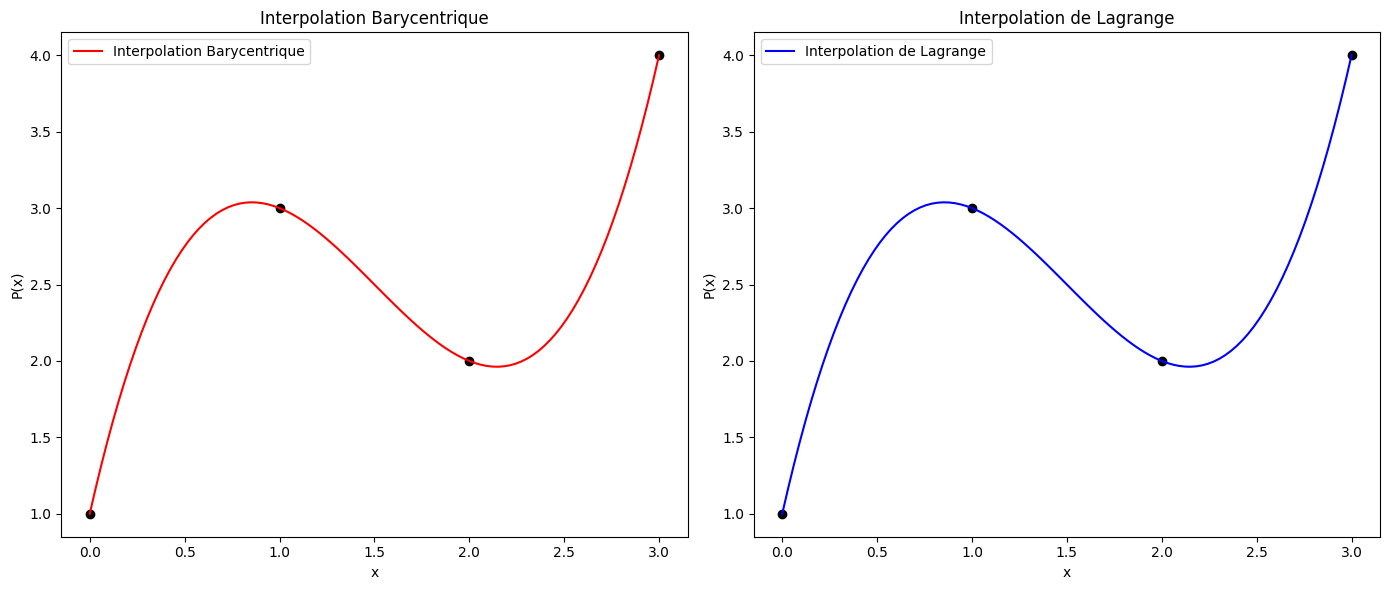

In [6]:
x = [0, 1, 2, 3]
y = [1, 3, 2, 4]
alpha = np.linspace(0, 3, 100)
values_bary = interpolation_barycentrique(x, y, alpha)
values_lagrange = interpolation_lagrange(x, y, alpha)

plt.figure(figsize=(14, 6))

# Méthode Barycentrique
plt.subplot(1, 2, 1)
plt.plot(alpha, values_bary, label='Interpolation Barycentrique', color='red')
plt.scatter(x, y, color='black')  
plt.title('Interpolation Barycentrique')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.legend()

# Méthode de Lagrange
plt.subplot(1, 2, 2)
plt.plot(alpha, values_lagrange, label='Interpolation de Lagrange', color='blue')
plt.scatter(x, y, color='black') 
plt.title('Interpolation de Lagrange')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
import time

start_bary = time.time()
interpolation_barycentrique(x, y, alpha)
end_bary = time.time()

start_lagrange = time.time()
interpolation_lagrange(x, y, alpha)
end_lagrange = time.time()

time_bary = end_bary - start_bary
time_lagrange = end_lagrange - start_lagrange

print("Temps mit par la methode barycentrique:", time_bary)
print("Temps mit par la methode de lagrange:", time_lagrange)


Temps mit par la methode barycentrique: 0.0
Temps mit par la methode de lagrange: 0.015491247177124023


### Comparaison des deux méthodes en termes de vitesses d'exécution avec des αi conséquentes.

In [8]:
x = np.linspace(0, 10, 50)
y = np.sin(x) # je prends f(x) = sin(x) 

alpha_large = np.linspace(0, 10, 1000)

start_bary = time.time()
interpolation_barycentrique(x, y, alpha)
end_bary = time.time()

start_lagrange = time.time()
interpolation_lagrange(x, y, alpha)
end_lagrange = time.time()

time_bary = end_bary - start_bary
time_lagrange = end_lagrange - start_lagrange

print("Temps mit par la methode barycentrique:", time_bary, "secondes")
print("Temps mit par la methode de lagrange:", time_lagrange, "secondes")


Temps mit par la methode barycentrique: 0.00809788703918457 secondes
Temps mit par la methode de lagrange: 0.2799036502838135 secondes


La méthode de lagreange calcule à chaque fois les polynômes de base de Lagrange pour chaque point d'évaluation α, ce qui implique une répétition de calculs intensifs pour chaque point d'évaluation. C'est ce qui rend la méthode de Lagrange moins efficace en termes de temps d'exécution.
La methode barycentrique précalcule des poids barycentriques pour chaque point xi, ce qui permet ensuite une évaluation rapide du polynôme d'interpolation pour tout point α. Le précalcul des poids réduit la quantité de calculs nécessaires en rendant la méthode plus rapide pour un grand nombre de points d'évaluation.
En mesurant les temps d'exécution de chaque méthode, on voit que la méthode barycentrique est plus rapide que la méthode de Lagrange pour évaluer un polynôme d'interpolation sur un grand ensemble de points.

## Methode de neville-Aitken

In [9]:
def neville_aitken(x, y, alpha):
    n = len(x)
    p = np.copy(y)  
        
    for k in range(1, n):
        for i in range(n - k):
            p[i] = ((x[i+k] - alpha) * p[i] + (alpha - x[i]) * p[i+1]) / (x[i+k] - x[i])
    
    return p[0]

In [10]:
x= np.linspace(0, 10, 50) 
y = np.sin(x) 
alpha = np.linspace(0, 10, 100)  

neville_results = [neville_aitken(x, y, alpha_i) for alpha_i in alpha]
neville_results

[0.0,
 0.10086256734356129,
 0.20064894527399607,
 0.2984132842024396,
 0.393136610787486,
 0.4838516317645937,
 0.5696341070457992,
 0.6496095108557283,
 0.7229625614086702,
 0.7889454629745343,
 0.8468855636027385,
 0.896192201041365,
 0.9363627251009653,
 0.9669876227078623,
 0.9877546923605521,
 0.9984522268999825,
 0.9989711717232405,
 0.9893062365144095,
 0.9695559491823488,
 0.9399216514300806,
 0.9007054462029419,
 0.8523071179396876,
 0.7952200570230515,
 0.7300262299764441,
 0.6573902466827752,
 0.5780525851065741,
 0.492822042588924,
 0.40256749066949593,
 0.30820901749007634,
 0.21070854807719314,
 0.11106003812412979,
 0.01027934124053454,
 -0.09060614703340772,
 -0.19056796287548516,
 -0.28858705872043233,
 -0.3836641918061122,
 -0.4748301108222389,
 -0.5611554368152021,
 -0.6417601376193873,
 -0.7158224992291902,
 -0.782587502654202,
 -0.8413745208608698,
 -0.89158425733514,
 -0.9327048555318335,
 -0.9643171169287779,
 -0.9860987744909295,
 -0.9978277779792123,
 -0.99938

In [12]:
start_neville = time.time()
neville_results = [neville_aitken(x, y, alpha_i) for alpha_i in alpha]
end_neville = time.time()
time_neville = end_neville - start_neville
time_neville

0.21025705337524414